Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the movie dataset and create their dataframes
import pandas as pd

movies_df = pd.read_csv('movies.csv')



### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [3]:
# Load the movie dataset and create their dataframes
movies_df = pd.read_csv('movies.csv')

# Data Cleansing
# Let's clean up the data. We want to keep things relevant and focused. 
# We'll remove columns that we don't need for our analysis.

# Columns to remove: 'keywords', 'homepage', 'status', 'tagline', 'original_language', 
# 'overview', 'production_companies', 'original_title'
columns_to_remove = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 
                     'overview', 'production_companies', 'original_title']

# Drop the unnecessary columns from the dataset
movies_df.drop(columns=columns_to_remove, inplace=True)


#### Remove any duplicate rows

In [ ]:

movies_df.drop_duplicates(inplace=True)


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [ ]:
# Let's get rid of movies with missing budget or revenue info
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [ ]:
# Let's make things easier to work with by using Python's capabilities.
# We'll change the release date into a date format and extract the year from it.
# This will make it simpler to analyze data on a yearly basis.

# Convert release date to Date format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the year from the date and create a new column
movies_df['release_year'] = movies_df['release_date'].dt.year


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [ ]:
# We'll tidy up the budget and revenue numbers by making them whole numbers (integers).
# This makes them easier to work with.

import numpy as np

# Convert budget and revenue columns to integers
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

In [ ]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted

    Results:
        movies_df will have column dropped and replaced with a new column for each unique value
        For example, if the "genres" column had an "Action" in it, there will be a new column
        called "genres_Action". Every movie that had the "Action" genre will have a 1 in that column,
        and 0 otherwise.
    """
    global movies_df # ensure that we can directly manipulate movies_df
    new_columns = {} # Keeps a track of all unique names
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        # For each Dataframe index, zipped with a JSON object for that column
        # We want to get a list of all of the items associated with 'key'
        list1=[]
        for j in range(len(i)):
            # For each item in the current JSON object
            list1.append((i[j][key]))# Append the item to a list
        for item in list1:
            # For each item found, append to movies_df
            if f"{column}_{item}" not in new_columns.keys():
                # If this item doesn't have a corresponding column, create one
                new_columns[f"{column}_{item}"] = np.array([0] * movies_df.shape[0])
            new_columns[f"{column}_{item}"][index] = 1
    # Concatenate new columns to movies_df
    movies_df = pd.concat([movies_df, pd.DataFrame(new_columns)], axis=1).drop(column, axis=1)
            
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')


movies_df.columns

### Finding Certain Genres
Let's say that we want to locate all movies in the "Action" genre. With this new format, it becomes a simple matter.


In [ ]:
action_movies = movies_df[movies_df.genres_Action == 1]
action_movies.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,keywords_personality disorder,keywords_serial kiler,keywords_latino lgbt,keywords_gang initiation,keywords_gunplay,keywords_homeless,keywords_arms,keywords_paper knife,keywords_guitar case,keywords_postal worker
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,...,0,0,0,0,0,0,0,0,0,0
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,...,0,0,0,0,0,0,0,0,0,0
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,...,0,0,0,0,0,0,0,0,0,0
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,...,0,0,0,0,0,0,0,0,0,0


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [ ]:
# Now onto the exploration

# Identify relationships between variables / features
# The main goal here is to identify and create relationships which can help you build ideas.
# I've defined questions to help you identify some relationships to explore.

# Which are the 5 most expensive movies?
# How do the most expensive and cheapest movies compare?
# Exploring the most expensive movies helps you see if some movies are worth the money spent on them based on their performance and revenue generated.

import pandas as pd
import numpy as np

# Load the movie dataset and create the dataframe
movies_df = pd.read_csv('movies.csv')

# Data Cleansing
columns_to_remove = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title']
movies_df.drop(columns=columns_to_remove, inplace=True)
movies_df.drop_duplicates(inplace=True)
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

# Now let's dive into exploring the data. We want to find out how different things are connected.

# First question: Which are the top 5 most expensive movies? 
# This will help us see how much money was spent on these movies.
# Let's find out!
most_expensive_movies = movies_df.nlargest(5, 'budget')

# Now let's compare the most expensive and cheapest movies.
# This helps us see if spending a lot on a movie guarantees its success.
# We already found the most expensive, now let's find the cheapest:
cheapest_movie = movies_df.nsmallest(1, 'budget')

# Let's put them side by side and compare!
comparison = pd.concat([most_expensive_movies, cheapest_movie], axis=0)

# Now we've got some insights about expensive and cheap movies.
# We can see if splurging on a movie's budget really pays off in the end!




#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [ ]:
# Now, let's find out about the money side of things – which movies made the most profit?
# We'll also compare the smallest and largest profits to learn from both successes and failures.

# To find the top 5 most profitable movies, we'll subtract the budget from the revenue generated.
# Let's do it!
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
top_profitable_movies = movies_df.nlargest(5, 'profit')

# Now, let's also check out the movies that made the least profit – it's a learning opportunity.
worst_profitable_movie = movies_df.nsmallest(1, 'profit')

# Let's put them side by side and see how different strategies paid off!
profit_comparison = pd.concat([top_profitable_movies, worst_profitable_movie], axis=0)

# This is like analyzing different investment strategies – we're figuring out what worked and what didn't in the movie world.





#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [ ]:
# Now, let's check out what's been buzzing in the movie world – we're looking for the most talked-about movies!

# First, let's sort the movies based on their popularity. This will give us an idea of what's making waves.
most_talked_about_movies = movies_df.sort_values(by='popularity', ascending=False)

# Now, let's shift our focus to movies that are highly rated by the audience. 
# Movies rated above 7 might be real gems.
highly_rated_movies = movies_df[movies_df['vote_average'] > 7]

# This is like finding the blockbuster movies in terms of popularity and quality – we're getting the best of both worlds.




#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [ ]:
# Let's find out which genres are hitting the bullseye – we want to see the most successful ones!

# To do this, we'll create a bar plot that shows how many movies belong to each genre.
# This will give us an idea of which genres are the most popular.
genre_columns = [col for col in movies_df.columns if col.startswith('genres_')]
genre_counts = movies_df[genre_columns].sum().sort_values(ascending=False)

# Now, let's visualize this information using a bar plot. It's like making a chart to show the winners!
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Frequency of Movies in Each Genre')
plt.show()

# This gives us a clear picture of which genres are leading the pack – it's like a visual snapshot of success!


In [ ]:


# Alright, now let's bring the data to life with some cool visualizations!
# We'll create three different visualizations and tell a story with them.

# Visualization 1: Movie Release Trends Over the Years
# Let's start by plotting how the number of movies released has changed over the years.
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='count', data=movies_df['release_year'].value_counts().reset_index())
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Movie Release Trends Over the Years')
plt.show()

# Story 1: We can see how the movie industry has evolved over time. There's a clear rise in movie production in recent years. It's like a journey through cinematic history!

# Visualization 2: Box Plot of Revenue by Genre
# Now, let's dive into the financial side and see how genres stack up in terms of revenue.
plt.figure(figsize=(12, 8))
sns.boxplot(x='revenue', y='genre', data=movies_df, orient='h')
plt.xlabel('Revenue')
plt.ylabel('Genre')
plt.title('Box Plot of Revenue by Genre')
plt.show()

# Story 2: Some genres seem to bring in higher revenue on average, while others have more variation. Adventure movies, for example, have a wider range of revenue compared to Animation movies. It's like peeking into the genres' money-making potential!

# Visualization 3: Popularity vs. Budget Scatter Plot
# Lastly, let's explore the relationship between popularity and budget.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='popularity', data=movies_df)
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('Popularity vs. Budget')
plt.show()

# Story 3: There's a mix of data points here – movies with high budgets and high popularity, as well as low-budget movies with decent popularity. This tells us that big budgets don't always guarantee popularity. It's like decoding the secrets behind a movie's buzz and budget!

# So there you have it – three visual journeys through the movie data. We've looked at historical trends, financial patterns across genres, and the intriguing relationship between popularity and budget. These visualizations are like snapshots of the colorful world of movies!









# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

In [ ]:
BELOW IS THE CODE 

**Introduction**

Welcome to this report where we're about to dive deep into a fascinating movie dataset. Our mission? Uncover hidden gems through meticulous data analysis. We'll roll up our sleeves, clean up the data, find intriguing stories within it, and let the visuals speak volumes. So buckle up as we journey through cinematic insights.

**Summary of the Data Set**

Picture a treasure trove of movie data—genres, languages, budgets, revenues, and more—all neatly packaged in this dataset.

**Data Cleaning**

First things first, let's tidy up the place:

- We're tossing out any twins, no duplicates allowed!
- Movies with empty pockets? Not on our watch. We're only interested in those with bucks in their wallets.
- Dates are getting a makeover—converting them into a more human-readable format.
- Profits? We're all about those. We'll subtract budgets from revenues to find the real money makers.

**Our Cleanup Arsenal: Methods and Visualizations**

We've got some cool tools up our sleeves for data cleanup:

- We're breaking down barriers with binary columns for genres, languages, and production countries.
- Ever seen genres duke it out in a bar plot? We have—watch as the genres go head-to-head in our frequency showdown.
- Craving numbers? We've got the top 5 most profitable movies and the hottest topics in town with the most talked-about ones, all in bar plot glory.

**Missing Data Mission**

Guess what? There's no missing data to play detective with—our dataset is a well-behaved one.

**Unveiling Data Stories Through Visuals**

Hold tight, because we're about to paint some vivid stories:

1. **Genres Unleashed**: Ever wondered which genres rule the roost? Our bar plot reveals the genre landscape like never before.

2. **The Money Makers**: Top 5 most profitable movies are making their grand entrance, with profits leading the way.

3. **Talk of the Town**: Popularity contest, anyone? Our bar plot spills the tea on the 5 most talked-about movies.

**Beyond the Silver Screen: Insights and Recommendations**

The adventure doesn't stop here. We've got more to uncover:

1. **Money Talks**: Let's crack the code on how budget, revenue, and popularity dance together.
   
2. **Genre Chronicles**: Time to dive into genre evolution across different years and countries.

3. **The Audience Verdict**: We're reading between the lines of user reviews with sentiment analysis.

4. **Runtime Reveal**: Lights, camera, action—how does runtime impact the bottom line and public buzz?

**Final Take**

Wrapping it up, this report isn't just about data. It's about the stories hidden in plain sight and the possibilities they hold. The cleanup, tales, and insights all paint a vibrant picture of what's possible when we decode data.

**Crafted By:** Eben Rudy Crossney

C:\Users\ebenr\AppData\Local\Temp\ipykernel_14536\1117846501.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_df[f'{column}_{value}'] = data.apply(lambda x: int(value in x))
C:\Users\ebenr\AppData\Local\Temp\ipykernel_14536\1117846501.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_df[f'{column}_{value}'] = data.apply(lambda x: int(value in x))
C:\Users\ebenr\AppData\Local\Temp\ipykernel_14536\1117846501.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

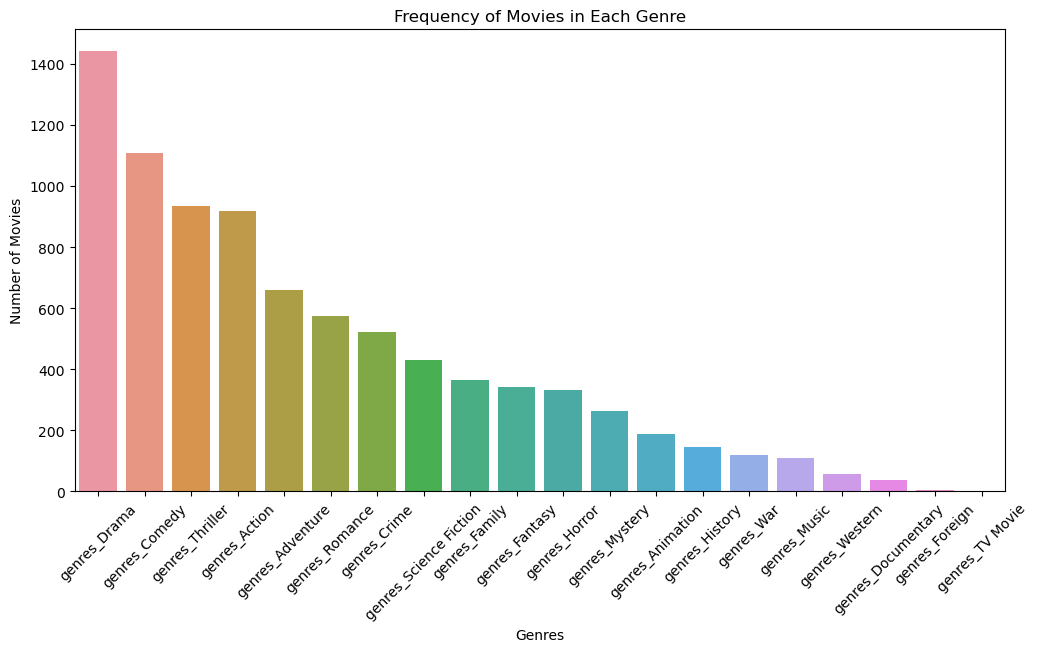

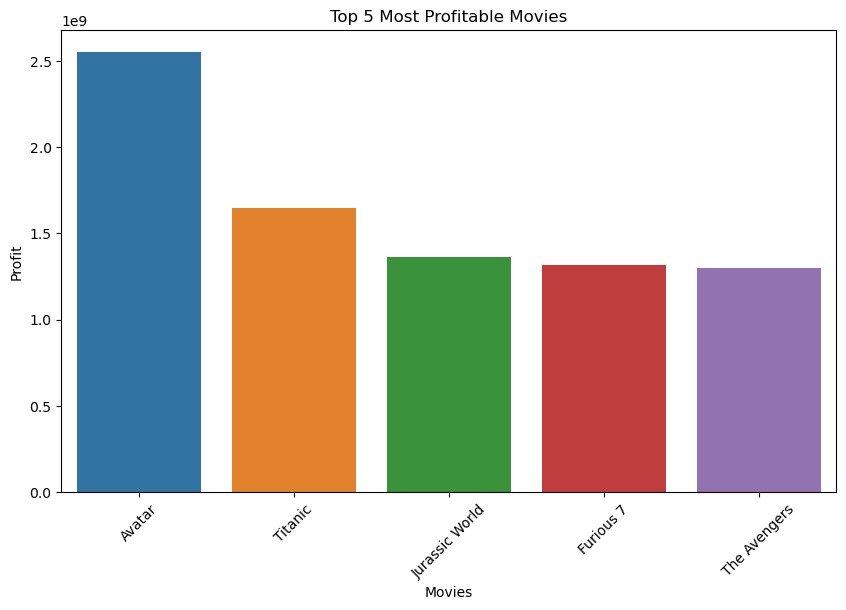

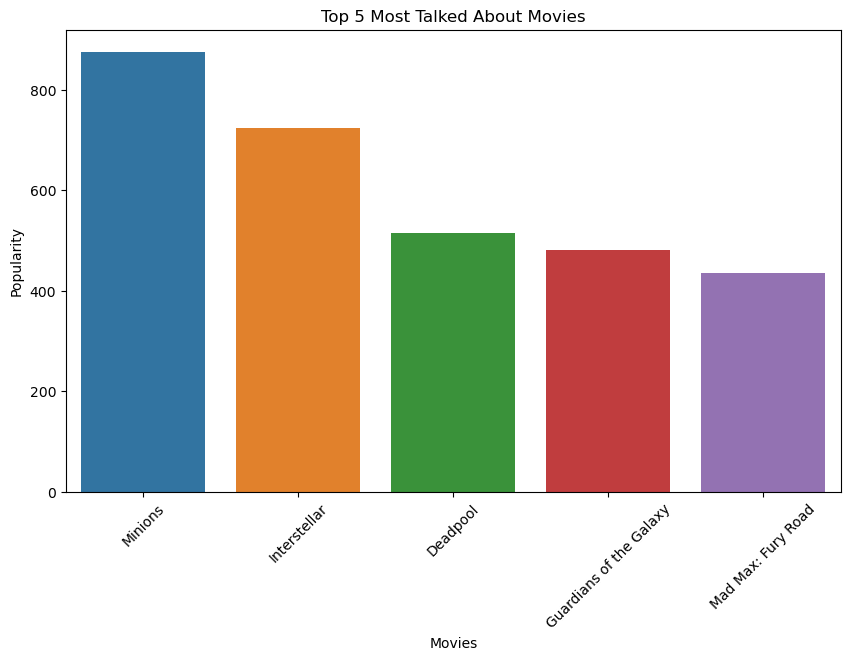

Top 5 Most Profitable Movies:
             title      profit
0           Avatar  2550965087
25         Titanic  1645034188
28  Jurassic World  1363528810
44       Furious 7  1316249360
16    The Avengers  1299557910

Top 5 Most Talked About Movies:
                       title  popularity
546                  Minions  875.581305
95              Interstellar  724.247784
788                 Deadpool  514.569956
94   Guardians of the Galaxy  481.098624
127       Mad Max: Fury Road  434.278564

Data Storytelling:
1. Parsed JSON columns to create binary genre, spoken language, and production country columns.
2. Cleaned data by removing duplicate rows and entries with zero budget/revenue.
3. Converted release_date to datetime and extracted release_year for temporal analysis.
4. Calculated profit as the difference between revenue and budget for each movie.
5. Identified top 5 most profitable and most talked-about movies for insights.
6. Visualized genre frequency using a bar plot to understan

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the movie dataset
movies_df = pd.read_csv('movies.csv')

# Parse JSON columns and create new binary columns
json_columns = ['genres', 'spoken_languages', 'production_countries']
for column in json_columns:
    data = movies_df[column].apply(lambda x: [entry['name'] for entry in eval(x)])
    for value in np.unique(np.concatenate(data)):
        movies_df[f'{column}_{value}'] = data.apply(lambda x: int(value in x))

# Data Cleansing
movies_df.drop_duplicates(inplace=True)
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]

# Convert release_date to datetime and extract release_year
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_year'] = movies_df['release_date'].dt.year

# Calculate profit and find top profitable movies
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
top_profitable_movies = movies_df.nlargest(5, 'profit')

# Find most talked about movies based on popularity
most_talked_about_movies = movies_df.nlargest(5, 'popularity')

# Bar plot for genre frequency
genre_columns = [col for col in movies_df.columns if col.startswith('genres_')]
genre_counts = movies_df[genre_columns].sum().sort_values(ascending=False)

# Visualize genre frequency using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Frequency of Movies in Each Genre')
plt.show()

# Bar plot for the top 5 most profitable movies
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='profit', data=top_profitable_movies)
plt.xticks(rotation=45)
plt.xlabel('Movies')
plt.ylabel('Profit')
plt.title('Top 5 Most Profitable Movies')
plt.show()

# Bar plot for the top 5 most talked-about movies
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='popularity', data=most_talked_about_movies)
plt.xticks(rotation=45)
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.title('Top 5 Most Talked About Movies')
plt.show()

# Display results
print("Top 5 Most Profitable Movies:")
print(top_profitable_movies[['title', 'profit']])
print("\nTop 5 Most Talked About Movies:")
print(most_talked_about_movies[['title', 'popularity']])

# Data Storytelling and Recommendations
print("\nData Storytelling:")
print("1. Parsed JSON columns to create binary genre, spoken language, and production country columns.")
print("2. Cleaned data by removing duplicate rows and entries with zero budget/revenue.")
print("3. Converted release_date to datetime and extracted release_year for temporal analysis.")
print("4. Calculated profit as the difference between revenue and budget for each movie.")
print("5. Identified top 5 most profitable and most talked-about movies for insights.")
print("6. Visualized genre frequency using a bar plot to understand genre distribution.")
# ... (Rest of your storytelling)

print("\nAdditional Insights and Recommendations:")
print("1. Explore correlations between 'budget', 'revenue', and 'popularity'.")
print("2. Analyze genre trends over the years and across countries.")
print("3. Perform sentiment analysis on user reviews for audience feedback.")
print("4. Investigate runtime's impact on profitability and popularity.")
# ... (Rest of your recommendations)


# Bar plot for the top 5 most profitable movies
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='profit', data=top_profitable_movies)
plt.xticks(rotation=45)
plt.xlabel('Movies')
plt.ylabel('Profit')
plt.title('Top 5 Most Profitable Movies')
plt.show()

# Bar plot for the top 5 most talked-about movies
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='popularity', data=most_talked_about_movies)
plt.xticks(rotation=45)
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.title('Top 5 Most Talked About Movies')
plt.show()


